In [1]:
import tensorflow as tf

In [2]:
import sys
print(sys.executable)

c:\users\aiims-iitd\appdata\local\programs\python\python37\python.exe


In [3]:
tf.__version__

'2.1.0'

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [6]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [7]:
path = 'Work_to_be_Completed_ILBS'
pid = []
image_file = []
for fname in os.listdir(path):
    if fname.isdigit():
        pid.append(fname)
        for fname_ins in os.listdir(path+'\\'+fname):
            image_file.append(path+'\\'+fname+'\\'+fname_ins)

In [8]:
df_f = pd.DataFrame(image_file)

In [9]:
df_f[0][1].split('\\')[-2]


'00910'

In [18]:
df_label = pd.read_excel(path+'\\'+'HVPG value with CT images.xlsx',engine='openpyxl')

In [19]:
df_label.head()


,ID,Date,HVPG
0,9109,2019-01-30,21
1,19699,2019-02-13,12
2,31322,2019-02-15,17
3,45341,2019-02-13,16
4,49565,2019-02-06,10


In [20]:
labels = []
for row in df_f.values.tolist():
    id_ = int(row[0].split('\\')[-2])
    if id_ == 910:
        id_ = 9109
    for rows in df_label.values.tolist():
        if id_==rows[0]:
            labels.append([row[0],rows[-1]])
           # print(label)
        #break
    #print(row,id_)
    #break

In [21]:
len(labels)


35011

In [22]:
len(df_f)


35011

In [23]:
df = pd.DataFrame(labels,columns=['path','label'])


In [24]:
df.head()


,path,label
0,Work_to_be_Completed_ILBS\00910\IMG-0005-00001...,21
1,Work_to_be_Completed_ILBS\00910\IMG-0005-00002...,21
2,Work_to_be_Completed_ILBS\00910\IMG-0005-00003...,21
3,Work_to_be_Completed_ILBS\00910\IMG-0005-00004...,21
4,Work_to_be_Completed_ILBS\00910\IMG-0005-00005...,21


In [25]:
df['path'][0]

'Work_to_be_Completed_ILBS\\00910\\IMG-0005-00001.jpg'

In [26]:
from tensorflow import keras
#X = df['imarray'].values
y = np.array(df['label'])
y = keras.utils.to_categorical(y)

In [27]:
all_images = []
IMG_HEIGHT = IMG_WIDTH =150
for row in df['path']:
    image= cv2.imread( row, cv2.IMREAD_GRAYSCALE)
    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image=np.array(image)
    image = image.astype('float32')
    image /= 255
    #image = np.expand_dims(image, axis=0)
    all_images.append(image)

In [28]:
train_ = np.array(all_images)

In [29]:
train_.shape

(35011, 150, 150)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_,y,test_size=0.25,shuffle=True,random_state=123)

In [31]:
X_train_t = np.expand_dims(X_train,axis=3)
X_test_t = np.expand_dims(X_test, axis=3)

In [32]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(150, 150,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(28, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 341056)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               43655296  
_________________________________________________________________
dense_1 (Dense)              (None, 28)                3612      
Total params: 43,677,724
Trainable params: 43,677,724
Non-trainable params: 0
____________________________________________

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_t, y_train,validation_split=0.1, batch_size=100, epochs=15, verbose=1,shuffle=True)

Train on 23632 samples, validate on 2626 samples
Epoch 1/15
23632/23632 [==============================] - 57s 2ms/sample - loss: 0.4648 - accuracy: 0.8823 - val_loss: 0.0261 - val_accuracy: 0.9890
Epoch 2/15
23632/23632 [==============================] - 19s 810us/sample - loss: 0.0322 - accuracy: 0.9882 - val_loss: 0.0280 - val_accuracy: 0.9878
Epoch 3/15
23632/23632 [==============================] - 19s 811us/sample - loss: 0.0239 - accuracy: 0.9883 - val_loss: 0.0200 - val_accuracy: 0.9890
Epoch 4/15
23632/23632 [==============================] - 19s 812us/sample - loss: 0.0194 - accuracy: 0.9894 - val_loss: 0.0190 - val_accuracy: 0.9871
Epoch 5/15
23632/23632 [==============================] - 19s 813us/sample - loss: 0.0189 - accuracy: 0.9887 - val_loss: 0.0188 - val_accuracy: 0.9874
Epoch 6/15
23632/23632 [==============================] - 19s 810us/sample - loss: 0.0180 - accuracy: 0.9890 - val_loss: 0.0181 - val_accuracy: 0.9871
Epoch 7/15
23632/23632 [=======================

In [35]:
score = model.evaluate(X_test_t, y_test, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
score = model.evaluate(X_train_t, y_train, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

8753/8753 [==============================] - 4s 402us/sample - loss: 0.0170 - accuracy: 0.9891
Test loss: 0.0169650997535633
Test accuracy: 0.9891466
26258/26258 [==============================] - 9s 339us/sample - loss: 0.0160 - accuracy: 0.9888
Train loss: 0.016042899042303008
Train accuracy: 0.9888034


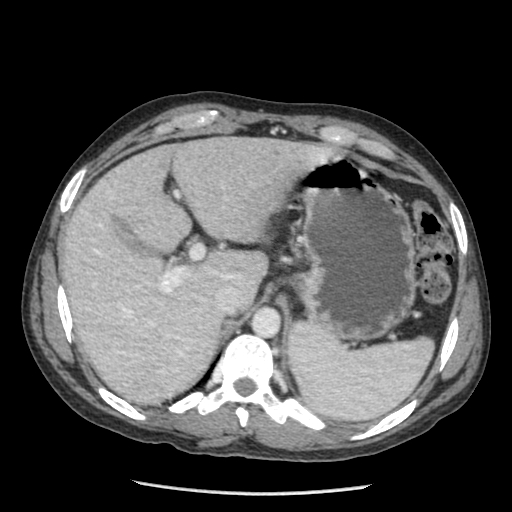

In [45]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

# The local path to our target image
img_path = 'Work_to_be_Completed_ILBS\\00910\\IMG-0005-00088.jpg'
# keras.utils.get_file(
#     'Work_to_be_Completed_ILBS\\00910\\IMG-0005-00001.jpg', 'https://i.imgur.com/Bvro0YD.png'
# )

display(Image(img_path))

In [46]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Predicted: [('n09229709', 'bubble', 7.2972903)]


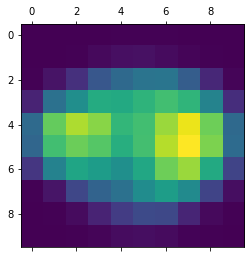

In [47]:
# Prepare image
import tensorflow as tf
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

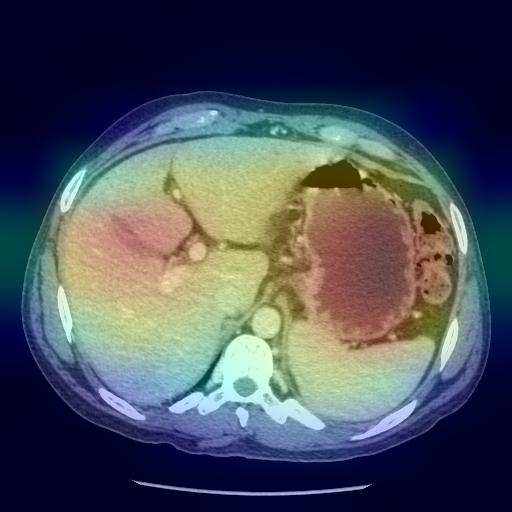

In [48]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [36]:
# for layer in model.layers:
#     print(layer.name)

conv2d
conv2d_1
max_pooling2d
flatten
dense
dense_1
